# Twitter tweets analysis

In [1]:
# import libraries
import tweepy as tw
# your Twitter API key and API secret
my_api_key = 'sM6f7HCKF671xWBwkU55VFgx8'
my_api_secret = 'XIuzMfdbmZXQKEMkZ7yJkktWNo41xpi2VI9VBkkbjXTvJsFeMv'
access_token= '1484408562332086272-P2Yp56jrgxfVOrNvzVSG7sdd1yfMvv'
access_token_secret= 'DeweKz9glncanpAVsduzYa0oAEDvRvmSNCiBczMWqdlP2'

# authenticate
auth = tw.OAuthHandler(my_api_key, my_api_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [2]:
search_query = "#election2022 -filter:retweets"

In [3]:
# get tweets from the API
tweets = tw.Cursor(api.search_tweets,q=search_query,lang="en").items(100)

In [4]:
# store the API responses in a list
tweets_copy = []
for tweet in tweets:
    tweets_copy.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy))

Total Tweets fetched: 100


In [5]:
print(tweets_copy[0])

Status(_api=<tweepy.api.API object at 0x000001D66357A190>, _json={'created_at': 'Thu May 19 11:31:42 +0000 2022', 'id': 1527250639310540800, 'id_str': '1527250639310540800', 'text': 'Three Mecklenburg County races tight after Election Day. Are recounts next? - Charlotte Observer https://t.co/ph12c6peKt #Election2022', 'truncated': False, 'entities': {'hashtags': [{'text': 'Election2022', 'indices': [121, 134]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/ph12c6peKt', 'expanded_url': 'https://www.charlotteobserver.com/news/politics-government/election/article261571137.html', 'display_url': 'charlotteobserver.com/news/politics-…', 'indices': [97, 120]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'u

In [6]:
import pandas as pd
# intialize the dataframe
tweets_df = pd.DataFrame()
# populate the dataframe
for tweet in tweets_copy:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,\
                                               'user_description': tweet.user.description,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source}))
    tweets_df = tweets_df.reset_index(drop=True)
# show the dataframe
tweets_df.head()

,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,Web Central TV,"Georgia, USA","The Evolution of News, Streaming and Digital C...",False,2022-05-19 11:31:42+00:00,Three Mecklenburg County races tight after Ele...,[Election2022],Twitter Web App
1,Nae van Dort (Naomi Elizabeth),"New South Wales, Australia",,False,2022-05-19 11:30:55+00:00,"PUT THE MAJORS LAST (Labor, Liberal, Greens, N...","[election, election2022]",Twitter for iPhone
2,#MedicareForAll Mike Hersh,Maryland--DC Area,RTs may or may not be endorsements. Views expr...,False,2022-05-19 11:26:33+00:00,@Leftists4Office @pdamerica @PdaFox @AlanMinsk...,None,Twitter for iPad
3,Kearni N. Warren,,,False,2022-05-19 11:20:23+00:00,I’m so happy for Carol! She is on her way to m...,"[delawarecounty, election2022]",Twitter for iPhone
4,Andy_Downunda Triple vaxed,"Melbourne, Victoria",Happily Married. No DMs or Anime please. Fight...,False,2022-05-19 11:19:16+00:00,"@macsween_prue @AlboMP I'm a Labor supporter, ...","[uspol2022, Election2022]",Twitter Web App


# Preprocessing data 

In [7]:
tweets_df['text']=tweets_df['text'].apply(lambda x: str(x))
tweets_df['text']=tweets_df['text'].apply(lambda x: x.lower())

In [8]:
tweets_df['text'].head()

0    three mecklenburg county races tight after ele...
1    put the majors last (labor, liberal, greens, n...
2    @leftists4office @pdamerica @pdafox @alanminsk...
3    i’m so happy for carol! she is on her way to m...
4    @macsween_prue @albomp i'm a labor supporter, ...
Name: text, dtype: object

In [9]:
# Removing stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
tweets_df['text']=tweets_df['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))

In [10]:
tweets_df['text'].head()

0    three mecklenburg county races tight election ...
1    put majors last (labor, liberal, greens, natio...
2    @leftists4office @pdamerica @pdafox @alanminsk...
3    i’m happy carol! way making history 159th! #de...
4    @macsween_prue @albomp i'm labor supporter, pr...
Name: text, dtype: object

In [11]:
# removing link and website addresses using regular expression library
import re
tweets_df['text']=tweets_df['text'].apply(lambda x: re.sub("'", '', x))
tweets_df['text']=tweets_df['text'].apply(lambda x: re.sub("http\S+|www\S+|https\S+", '', x, flags=re.MULTILINE))

In [12]:
tweets_df['text'].head()

0    three mecklenburg county races tight election ...
1    put majors last (labor, liberal, greens, natio...
2    @leftists4office @pdamerica @pdafox @alanminsk...
3    i’m happy carol! way making history 159th! #de...
4    @macsween_prue @albomp im labor supporter, pru...
Name: text, dtype: object

In [13]:
import string
exclude = set(string.punctuation) 
tweets_df['text']=tweets_df['text'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [14]:
tweets_df['text'].head()

0    three mecklenburg county races tight election ...
1    put majors last labor liberal greens nationals...
2    leftists4office pdamerica pdafox alanminsky ja...
3    i’m happy carol way making history 159th delaw...
4    macsweenprue albomp im labor supporter prue no...
Name: text, dtype: object

In [15]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)
tweets_df['text'].head()

0    three mecklenburg county races tight election day recounts next  charlotte observer  election2022                                                                                                                                                                                                                    
1    put majors last labor liberal greens nationals  election election2022 election22 aussieelection australianelection votethemajorslast putthemajorslast majorslast endallmandates reinstatealljobs standupaustralia halftimespeech                                                                                     
2    leftists4office pdamerica pdafox alanminsky janskay drbillh oldgringoaz thomhartmann mimikennedyla donnasicko borisdirnbach chicating harveyjkaye banelmes2001 bwestbrookaz8 congratulations summer lee progressive winner midterms2022 election2022 defeat dark money yes can huge shout pda’s phone team join here 
3    i’m happy carol way making history 159th delawarec

In [16]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [17]:
# tokenization
final_lst=[]
for i in range(0,len(tweets_df['text'])):
    a= word_tokenize(tweets_df['text'][i])
    final_lst.append(a)
final_lst

[['three',
  'mecklenburg',
  'county',
  'races',
  'tight',
  'election',
  'day',
  'recounts',
  'next',
  'charlotte',
  'observer',
  'election2022'],
 ['put',
  'majors',
  'last',
  'labor',
  'liberal',
  'greens',
  'nationals',
  'election',
  'election2022',
  'election22',
  'aussieelection',
  'australianelection',
  'votethemajorslast',
  'putthemajorslast',
  'majorslast',
  'endallmandates',
  'reinstatealljobs',
  'standupaustralia',
  'halftimespeech'],
 ['leftists4office',
  'pdamerica',
  'pdafox',
  'alanminsky',
  'janskay',
  'drbillh',
  'oldgringoaz',
  'thomhartmann',
  'mimikennedyla',
  'donnasicko',
  'borisdirnbach',
  'chicating',
  'harveyjkaye',
  'banelmes2001',
  'bwestbrookaz8',
  'congratulations',
  'summer',
  'lee',
  'progressive',
  'winner',
  'midterms2022',
  'election2022',
  'defeat',
  'dark',
  'money',
  'yes',
  'can',
  'huge',
  'shout',
  'pda',
  '’',
  's',
  'phone',
  'team',
  'join',
  'here'],
 ['i',
  '’',
  'm',
  'happy',

In [18]:
for i in range(0,len(tweets_df['text'])):
    final_lst[i] = [word for word in final_lst[i] if not word in stopwords.words()]

In [19]:
#Appling stemming
ps = PorterStemmer()
for i in range(0,len(tweets_df['text'])):
    final_lst[i] = [[ps.stem(i) for i in word.split(" ")] for word in final_lst[i]]

In [20]:
final_lst

[[['three'],
  ['mecklenburg'],
  ['counti'],
  ['race'],
  ['tight'],
  ['elect'],
  ['day'],
  ['recount'],
  ['next'],
  ['charlott'],
  ['observ'],
  ['election2022']],
 [['put'],
  ['major'],
  ['last'],
  ['labor'],
  ['liber'],
  ['green'],
  ['nation'],
  ['elect'],
  ['election2022'],
  ['election22'],
  ['aussieelect'],
  ['australianelect'],
  ['votethemajorslast'],
  ['putthemajorslast'],
  ['majorslast'],
  ['endallmand'],
  ['reinstatealljob'],
  ['standupaustralia'],
  ['halftimespeech']],
 [['leftists4offic'],
  ['pdamerica'],
  ['pdafox'],
  ['alanminski'],
  ['janskay'],
  ['drbillh'],
  ['oldgringoaz'],
  ['thomhartmann'],
  ['mimikennedyla'],
  ['donnasicko'],
  ['borisdirnbach'],
  ['chicat'],
  ['harveyjkay'],
  ['banelmes2001'],
  ['bwestbrookaz8'],
  ['congratul'],
  ['summer'],
  ['lee'],
  ['progress'],
  ['winner'],
  ['midterms2022'],
  ['election2022'],
  ['defeat'],
  ['dark'],
  ['money'],
  ['ye'],
  ['huge'],
  ['shout'],
  ['pda'],
  ['’'],
  ['phone']

In [21]:
# lemmatizing
import nltk
lm = WordNetLemmatizer()
for i in range(0,len(tweets_df['text'])):
  final_lst[i] = [[lm.lemmatize(i) for i in word] for word in final_lst[i]]

In [22]:
final_lst

[[['three'],
  ['mecklenburg'],
  ['counti'],
  ['race'],
  ['tight'],
  ['elect'],
  ['day'],
  ['recount'],
  ['next'],
  ['charlott'],
  ['observ'],
  ['election2022']],
 [['put'],
  ['major'],
  ['last'],
  ['labor'],
  ['liber'],
  ['green'],
  ['nation'],
  ['elect'],
  ['election2022'],
  ['election22'],
  ['aussieelect'],
  ['australianelect'],
  ['votethemajorslast'],
  ['putthemajorslast'],
  ['majorslast'],
  ['endallmand'],
  ['reinstatealljob'],
  ['standupaustralia'],
  ['halftimespeech']],
 [['leftists4offic'],
  ['pdamerica'],
  ['pdafox'],
  ['alanminski'],
  ['janskay'],
  ['drbillh'],
  ['oldgringoaz'],
  ['thomhartmann'],
  ['mimikennedyla'],
  ['donnasicko'],
  ['borisdirnbach'],
  ['chicat'],
  ['harveyjkay'],
  ['banelmes2001'],
  ['bwestbrookaz8'],
  ['congratul'],
  ['summer'],
  ['lee'],
  ['progress'],
  ['winner'],
  ['midterms2022'],
  ['election2022'],
  ['defeat'],
  ['dark'],
  ['money'],
  ['ye'],
  ['huge'],
  ['shout'],
  ['pda'],
  ['’'],
  ['phone']

In [23]:
# Pos tagging
pos= final_lst
flatten=[]
tagged=[]
for i in pos:
    flatten=flatten+i
for i in flatten :
    tagged=tagged+nltk.pos_tag(i)
print(tagged)    

[('three', 'CD'), ('mecklenburg', 'NN'), ('counti', 'NN'), ('race', 'NN'), ('tight', 'NN'), ('elect', 'NN'), ('day', 'NN'), ('recount', 'NN'), ('next', 'JJ'), ('charlott', 'NN'), ('observ', 'NN'), ('election2022', 'NN'), ('put', 'NN'), ('major', 'JJ'), ('last', 'JJ'), ('labor', 'NN'), ('liber', 'NN'), ('green', 'JJ'), ('nation', 'NN'), ('elect', 'NN'), ('election2022', 'NN'), ('election22', 'NN'), ('aussieelect', 'NN'), ('australianelect', 'NN'), ('votethemajorslast', 'NN'), ('putthemajorslast', 'NN'), ('majorslast', 'NN'), ('endallmand', 'NN'), ('reinstatealljob', 'NN'), ('standupaustralia', 'NNS'), ('halftimespeech', 'NN'), ('leftists4offic', 'NN'), ('pdamerica', 'NN'), ('pdafox', 'NN'), ('alanminski', 'NN'), ('janskay', 'NN'), ('drbillh', 'NN'), ('oldgringoaz', 'NN'), ('thomhartmann', 'NN'), ('mimikennedyla', 'NN'), ('donnasicko', 'NN'), ('borisdirnbach', 'NN'), ('chicat', 'NN'), ('harveyjkay', 'NN'), ('banelmes2001', 'NN'), ('bwestbrookaz8', 'NN'), ('congratul', 'NN'), ('summer', '

In [24]:
len(tagged)

1517

In [25]:
import numpy as np
x=np.array(tagged)
len(np.unique(x))

941

In [26]:
from collections import Counter
  
Counter = Counter(tagged)
most_occur = Counter.most_common(10)
print(most_occur)

[(('election2022', 'NN'), 100), (('auspol', 'NN'), 35), (('elect', 'NN'), 18), (('’', 'NN'), 18), (('vote', 'NN'), 16), (('thedrum', 'NN'), 13), (('morrison', 'NN'), 12), (('amp', 'NN'), 12), (('time', 'NN'), 7), (('gop', 'NN'), 7)]


In [27]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [29]:
tweets_df.head()

,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,Web Central TV,"Georgia, USA","The Evolution of News, Streaming and Digital Content Delivery Since 2003",False,2022-05-19 11:31:42+00:00,three mecklenburg county races tight election day recounts next charlotte observer election2022,[Election2022],Twitter Web App
1,Nae van Dort (Naomi Elizabeth),"New South Wales, Australia",,False,2022-05-19 11:30:55+00:00,put majors last labor liberal greens nationals election election2022 election22 aussieelection australianelection votethemajorslast putthemajorslast majorslast endallmandates reinstatealljobs standupaustralia halftimespeech,"[election, election2022]",Twitter for iPhone
2,#MedicareForAll Mike Hersh,Maryland--DC Area,RTs may or may not be endorsements. Views expressed are mine not those of @pdamerica https://t.co/b1SHWYrYeS,False,2022-05-19 11:26:33+00:00,leftists4office pdamerica pdafox alanminsky janskay drbillh oldgringoaz thomhartmann mimikennedyla donnasicko borisdirnbach chicating harveyjkaye banelmes2001 bwestbrookaz8 congratulations summer lee progressive winner midterms2022 election2022 defeat dark money yes can huge shout pda’s phone team join here,None,Twitter for iPad
3,Kearni N. Warren,,,False,2022-05-19 11:20:23+00:00,i’m happy carol way making history 159th delawarecounty election2022,"[delawarecounty, election2022]",Twitter for iPhone
4,Andy_Downunda Triple vaxed,"Melbourne, Victoria","Happily Married. No DMs or Anime please. Fighting 4 truth, justice & the Australian way. Love, Peace & Harmony are our way forward. Retired. Love Pomeranians.#",False,2022-05-19 11:19:16+00:00,macsweenprue albomp im labor supporter prue no im stupid uspol2022 election2022,"[uspol2022, Election2022]",Twitter Web App


In [30]:
text1 = " ".join(text for text in tweets_df.text)

In [31]:
# Creating word_cloud with text as argument in .generate() method

word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080).generate(text1)
# saving the image
word_cloud1.to_file('got.png')

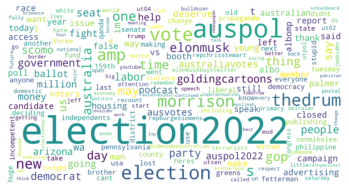

In [32]:
# Display the generated Word Cloud

plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [33]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

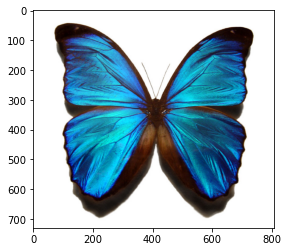

In [34]:
background_image = np.array(Image.open('Test2.jpg'))
plt.imshow(background_image)

In [35]:
# Creating word_cloud with text as argument in .generate() method
word_cloud2 = WordCloud(background_color = 'white',mask = background_image, 
               width = 2048, height = 1080).generate(text1)

# font color matching the masked image
img_colors = ImageColorGenerator(background_image)
word_cloud2.recolor(color_func = img_colors)

#saving the image
word_cloud2.to_file('disney.png')

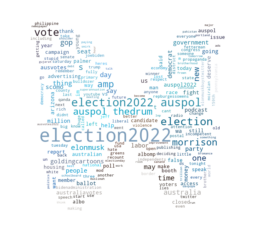

In [36]:
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()